## Introduction to Deep Learning 
# Training DNN with Keras
### Parkinson classification Example

In [256]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import utils_plot as uplot
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss

%matplotlib inline  

## Utilities

In [257]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

def print_stats(ytest, ypred):
    
    print("Accuracy: {:.5f}, Cohen's Kappa Score: {:.5f}".format(
        accuracy_score(ytest, ypred), 
        cohen_kappa_score(ytest, ypred, weights="quadratic")))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, ypred))
    print("Classification Report:")
    print(classification_report(ytest, ypred))

In [258]:
def drow_history_list(history_list, history_names=None,  metric=None):
    
    if metric is None:
        metric = 'loss'
        
    leg = []
    if history_names is not None:
        for n in history_names:
            leg.append('train ' + n)
            leg.append('test ' + n)
    else:
        for n in range(len(history_list)):
            leg.append('train ' + str(n))
            leg.append('test ' + str(n))
            
    for hist in history_list:
        
        plt.plot(hist.history[metric])
        plt.plot(hist.history['val_'+ metric], '--', linewidth=2)
        
        
    plt.title('model '+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(leg, loc='best')
    plt.show()  

In [259]:
import keras
# Keras has many build in data sets
from keras.datasets import mnist
# Sequential is the basic feed forward neural network (FFN)
from keras.models import Sequential
# Dense is fully connected layer
# Dropout is a "noising" layer, to prevent over feet.
from keras.layers import Dense, Dropout
# Read about optimizers in keras documentation
from keras.optimizers import RMSprop
from keras import optimizers

In [260]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

## Parkinson binary classification example
### Create, normalize and split data

In [261]:
df = pd.read_csv('parkinsons_updrs.data.txt')
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [262]:
len(df.columns)

22

In [263]:
df = pd.read_csv('parkinson.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [264]:
X = df[df.columns[1:27]]
y=df[28]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=42)

X_train.shape

C:\Users\naomi\Miniconda3\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naomi\Miniconda3\envs\py36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(728, 26)

### Build and compile keras model

In [265]:
np.random.seed(1235)

batch_size = 20
epochs = 20

def get_model(lsize=64, optimizer=RMSprop()):
    model = Sequential()
    model.add(Dense(lsize, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.1))
    model.add(Dense(lsize, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model=get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                1728      
_________________________________________________________________
dropout_35 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 65        
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [266]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))


Train on 728 samples, validate on 312 samples
Epoch 1/20
728/728 [==============================] - 2s 2ms/step - loss: 0.6656 - acc: 0.5852 - val_loss: 0.6456 - val_acc: 0.6506
Epoch 2/20
728/728 [==============================] - 0s 99us/step - loss: 0.6334 - acc: 0.6374 - val_loss: 0.6380 - val_acc: 0.6571
Epoch 3/20
728/728 [==============================] - 0s 97us/step - loss: 0.6163 - acc: 0.6511 - val_loss: 0.6227 - val_acc: 0.6731
Epoch 4/20
728/728 [==============================] - 0s 89us/step - loss: 0.6037 - acc: 0.6415 - val_loss: 0.6167 - val_acc: 0.6571
Epoch 5/20
728/728 [==============================] - 0s 77us/step - loss: 0.5993 - acc: 0.6662 - val_loss: 0.6116 - val_acc: 0.6635
Epoch 6/20
728/728 [==============================] - 0s 96us/step - loss: 0.5874 - acc: 0.6703 - val_loss: 0.6197 - val_acc: 0.6442
Epoch 7/20
728/728 [==============================] - 0s 84us/step - loss: 0.5829 - acc: 0.6703 - val_loss: 0.6037 - val_acc: 0.6667
Epoch 8/20
728/728 [====

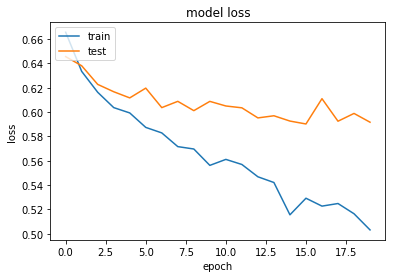

In [267]:
uplot.drow_history(history, 'loss')

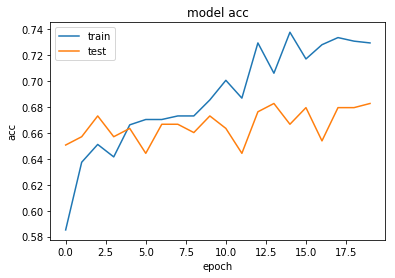

In [268]:
uplot.drow_history(history, 'acc')

## Evaluate model

In [269]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.591655954337
Test accuracy: 0.682692306164


## Predict

In [270]:
pred_test = model.predict(X_test)
y_pred_test = np.where(pred_test > 0.5, 1, 0).flatten()
print_stats(y_test,y_pred_test )

Accuracy: 0.68269, Cohen's Kappa Score: 0.36434
Confusion Matrix:
[[100  51]
 [ 48 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       151
           1       0.69      0.70      0.70       161

   micro avg       0.68      0.68      0.68       312
   macro avg       0.68      0.68      0.68       312
weighted avg       0.68      0.68      0.68       312



In [271]:
pred_test = model.predict(X_test)
y_pred_test = np.where(pred_test > 0.5, 1, 0).flatten()
y_pred_test[0:10], y_test[0:10].values

(array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1]),
 array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64))

In [272]:
print_stats(y_test,y_pred_test )

Accuracy: 0.68269, Cohen's Kappa Score: 0.36434
Confusion Matrix:
[[100  51]
 [ 48 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       151
           1       0.69      0.70      0.70       161

   micro avg       0.68      0.68      0.68       312
   macro avg       0.68      0.68      0.68       312
weighted avg       0.68      0.68      0.68       312



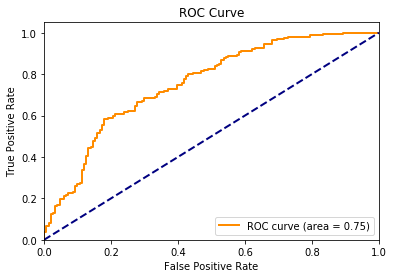

In [273]:
uplot.drow_roc_curve(y_test, model.predict(X_test))

## Optimizers
### SGD - Stochastic gradient descent optimizer.
Includes support for momentum, explained below. 

### Adagrad
is an algorithm for gradient-based optimization that does just this: It adapts the learning rate to the parameters, performing smaller updates
(i.e. low learning rates) for parameters associated with frequently occurring features, and larger updates (i.e. high learning rates) for parameters associated with infrequent features. For this reason, it is well-suited for dealing with sparse data.

### Adadelta
Adadelta is an extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate. 

### RMSprop 
is an unpublished, adaptive learning rate method proposed by Geoff Hinton in Lecture 6e of his Coursera Class.http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf

RMSprop and Adadelta have both been developed independently around the same time stemming from the need to resolve Adagrad's radically diminishing learning rates. 

### Adam
Adaptive Moment Estimation (Adam) is another method that computes adaptive learning rates for each parameter. 

Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface

* https://hackernoon.com/gradient-clipping-57f04f0adae
* https://keras.io/optimizers/
* https://hackernoon.com/gradient-clipping-57f04f0adae
* http://ruder.io/optimizing-gradient-descent/index.html

In [274]:
np.random.seed(1235)

batch_size = 20
epochs = 20

sgd = optimizers.SGD(lr=0.1)
model = get_model(lsize=64, optimizer=sgd)                  
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [275]:
history_sgd = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))


Train on 728 samples, validate on 312 samples
Epoch 1/20
728/728 [==============================] - 1s 1ms/step - loss: 0.6745 - acc: 0.5838 - val_loss: 0.6498 - val_acc: 0.6603
Epoch 2/20
728/728 [==============================] - 0s 87us/step - loss: 0.6404 - acc: 0.6154 - val_loss: 0.6355 - val_acc: 0.6442
Epoch 3/20
728/728 [==============================] - 0s 64us/step - loss: 0.6222 - acc: 0.6511 - val_loss: 0.6166 - val_acc: 0.6571
Epoch 4/20
728/728 [==============================] - 0s 86us/step - loss: 0.6093 - acc: 0.6538 - val_loss: 0.6202 - val_acc: 0.6667
Epoch 5/20
728/728 [==============================] - 0s 64us/step - loss: 0.6072 - acc: 0.6621 - val_loss: 0.6072 - val_acc: 0.6635
Epoch 6/20
728/728 [==============================] - 0s 64us/step - loss: 0.5907 - acc: 0.6676 - val_loss: 0.6289 - val_acc: 0.6442
Epoch 7/20
728/728 [==============================] - 0s 64us/step - loss: 0.5863 - acc: 0.6497 - val_loss: 0.6117 - val_acc: 0.6763
Epoch 8/20
728/728 [====

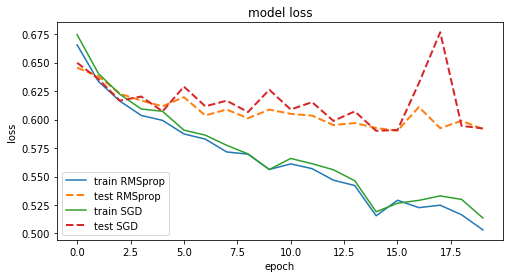

In [276]:
from IPython.core.pylabtools import figsize
figsize(8,4)
drow_history_list(history_list=[history, history_sgd], history_names=['RMSprop', 'SGD'],  metric=None)

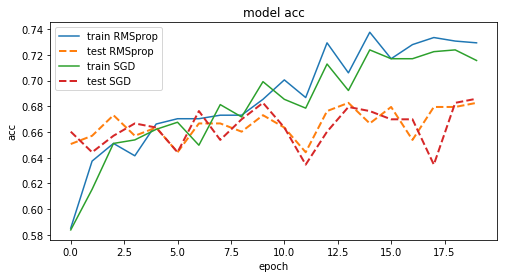

In [277]:
drow_history_list(history_list=[history, history_sgd], history_names=['RMSprop', 'SGD'],  metric='acc')

In [278]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.592205814826
Test accuracy: 0.685897435897


## Predict

In [279]:
pred_test = model.predict(X_test)
y_pred_test = np.where(pred_test > 0.5, 1, 0).flatten()
print_stats(y_test,y_pred_test )

Accuracy: 0.68590, Cohen's Kappa Score: 0.37141
Confusion Matrix:
[[103  48]
 [ 50 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       151
           1       0.70      0.69      0.69       161

   micro avg       0.69      0.69      0.69       312
   macro avg       0.69      0.69      0.69       312
weighted avg       0.69      0.69      0.69       312



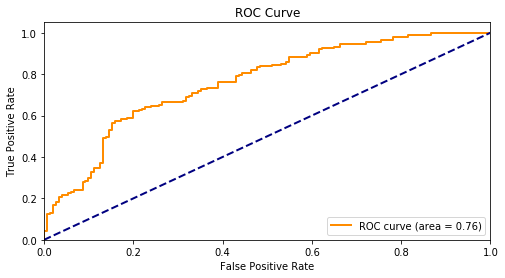

In [280]:
uplot.drow_roc_curve(y_test, model.predict(X_test))

## Exercise 

* Can you improve the result ?
* Try different optimizers, Adadelta, Adam
* Try different batch sized.

* My best result was:

Accuracy: 0.73077, Cohen's Kappa Score: 0.46054<br>
Confusion Matrix:<br>
[[107  44]<br>
 [ 40 121]]<br>
Classification Report:<br>
              precision    recall  f1-score   support<br>

           0       0.73      0.71      0.72       151
           1       0.73      0.75      0.74       161


## Momentum
Momentum is adding the past step direction, to the current which is calculated by the gradient. Usually set to 0.9

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/momuntum_sgd.JPG)
image from: optimizing-gradient-descent 
* http://ruder.io/optimizing-gradient-descent/index.html

### Learn more:
* https://keras.io/
* http://cs231n.github.io/neural-networks-3/